<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [1]:
# # # 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
import pandas as pd

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'
# df1
df1 = pd.read_excel(url, sheet_name = 0)#위치로 지정
df1 = df1.transpose()
df1.rename(columns = df1.iloc[0], inplace = True) ##행 이름 지정
df1 = df1.drop(df1.index[0])
# df2
df2 = pd.read_excel(url, sheet_name = 1)
df2 = df2.transpose()
new_header = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header 

## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요


(8, 32)
(8, 32)


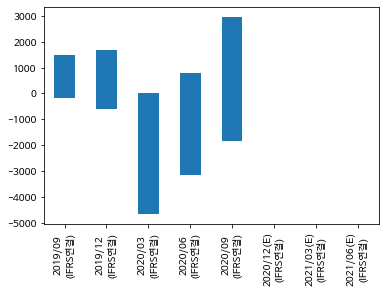

In [4]:

print(df1.shape) #dimension 은 row, columns로 구성
print(df2.shape)

df1 = df1.fillna(0)
df2.fillna(0, inplace = True)

num1 = df1.FCF[df1['FCF'] > 0].count() + df2.FCF[df2['FCF'] > 0].count()
num2 = df1.FCF[df1['FCF'] < 0].count() + df2.FCF[df2['FCF'] < 0].count()

df1['FCF'].plot.bar();
df2['FCF'].plot.bar();

## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [ ]:
df1.to_csv("./df1.csv", index = True)
df2.to_csv("./df2.csv", index = True)

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [ ]:
a = '1234'
b = 5678

int(a)+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [7]:
import seaborn as sns

pp = sns.load_dataset('penguins')

pp_crosstab = pd.crosstab(index = pp["species"], columns = pp["sex"])
pp_crosstab

num3 = pp_crosstab.max()[0]
num4 = pp_crosstab.min()[0]

num3, num4

(73, 34)

## 🔥 도전과제 

### penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다